In [16]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 51 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_ccastrob_7q9g6e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.613 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [18]:
madrid = pd.read_csv("../data/clean-madrid-v2.csv")

In [19]:
madrid.head()

,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,latitude,longitude,raw_address,neighborhood_id,buy_price,is_new_development,is_renewal_needed,has_lift,is_exterior,has_parking,floor,house_type,value_m2,neighborhood,district
0,21741,70.0,59.98,3,1,40.359340,-3.698374,Calle de la del Manojo de Rosas,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,129900,0,1,1,1,0,4.0,0,1796.68,Los Ángeles,Villaverde
1,21740,94.0,54.00,2,2,40.344630,-3.715191,"Calle del Talco, 68",Neighborhood 134: San Andrés (1617.18 €/m2) - ...,144247,0,0,1,1,0,1.0,0,1617.18,San Andrés,Villaverde
2,21738,108.0,90.00,2,2,40.357722,-3.685029,Carretera de Villaverde a Vallecas,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,260000,0,0,1,1,1,4.0,0,1827.79,Los Rosales,Villaverde
3,21737,126.0,114.00,4,2,40.343389,-3.712416,geologia,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,195000,0,0,0,1,1,3.0,0,1617.18,San Andrés,Villaverde
4,21736,120.0,100.00,5,2,40.348149,-3.706239,Avenida Real de Pinto,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,190000,0,0,0,1,1,1.0,0,1617.18,San Andrés,Villaverde


#### Due to correlation we have to eliminate "sq_mt_useful" column and "has_garden" has problems when we are importing it as CSV.

#### I will remove some other columns that won't be used to predict:

In [20]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9130 non-null   int64  
 1   sq_mt_built         9130 non-null   float64
 2   sq_mt_useful        9130 non-null   float64
 3   n_rooms             9130 non-null   int64  
 4   n_bathrooms         9130 non-null   int64  
 5   latitude            9130 non-null   float64
 6   longitude           9130 non-null   float64
 7   raw_address         9130 non-null   object 
 8   neighborhood_id     9130 non-null   object 
 9   buy_price           9130 non-null   int64  
 10  is_new_development  9130 non-null   int64  
 11  is_renewal_needed   9130 non-null   int64  
 12  has_lift            9130 non-null   int64  
 13  is_exterior         9130 non-null   int64  
 14  has_parking         9130 non-null   int64  
 15  floor               9130 non-null   float64
 16  house_

In [21]:
# Try model with log10(buy_price):

madrid["log_buy_price"] = np.log10(madrid.buy_price)

In [24]:
columns_to_drop = [#"has_garden", 
                   "sq_mt_useful",
                    "id", 
                   # "title", 
                   # "subtitle", 
                   "raw_address",
                    "buy_price",
                   "neighborhood_id"]

In [25]:
madrid.drop(columns_to_drop, axis=1, inplace=True)

<AxesSubplot:>

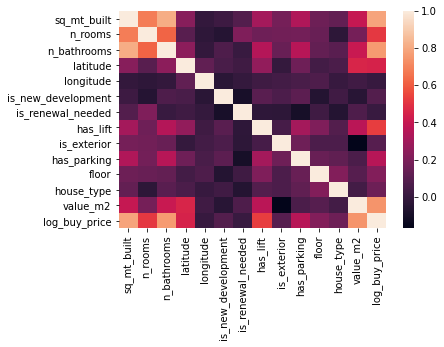

In [26]:
sns.heatmap(madrid.corr())

In [27]:
madrid.sample(5)

,sq_mt_built,n_rooms,n_bathrooms,latitude,longitude,is_new_development,is_renewal_needed,has_lift,is_exterior,has_parking,floor,house_type,value_m2,neighborhood,district,log_buy_price
6660,50.0,2,1,40.386956,-3.719264,0,0,1,1,0,1.0,0,2235.32,Opañel,Carabanchel,5.075547
3763,250.0,5,4,40.484145,-3.732275,0,0,1,1,1,4.0,0,3271.96,Peñagrande,Fuencarral,5.874482
5926,163.0,4,2,40.433091,-3.688007,0,0,1,1,1,4.0,0,4354.35,Castilla,Chamartín,5.812913
5967,91.0,2,1,40.459893,-3.675654,0,1,1,0,0,1.0,0,5363.75,Nueva España,Chamartín,5.623249
8803,61.0,3,1,40.401852,-3.719007,0,1,1,1,0,4.0,0,4098.59,Imperial,Arganzuela,5.342225


In [28]:
y = madrid.log_buy_price

In [29]:
X = madrid.drop("log_buy_price", axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### H2O train:

In [35]:
h2o_df = h2o.H2OFrame(madrid)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
train_h2o, test_h2o = h2o_df.split_frame(ratios=[0.8])

In [37]:
train_h2o.shape

(7263, 16)

In [38]:
test_h2o.shape

(1867, 16)

In [39]:
y_cols = "log_buy_price"

In [40]:
X_cols = train_h2o.drop("log_buy_price", axis=1).columns

In [ ]:
automl = H2OAutoML(max_models=250, max_runtime_secs=6000)
automl.train(x=X_cols, y=y_cols, training_frame=train_h2o)

AutoML progress: |████████████████████████████████████████████████████████

In [ ]:
lb = automl.leaderboard
lb.head()

In [19]:
predictions = automl.leader.predict(test_h2o)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [20]:
predictions.shape

(1689, 1)

In [21]:
test_h2o["prediction"] = predictions

In [22]:
test_df = test_h2o.as_data_frame()

In [ ]:
test_df.a

In [23]:
cols = ["buy_price", "prediction"]

In [24]:
type(test_df)

pandas.core.frame.DataFrame

In [49]:
test_h2o.columns

['sq_mt_built',
 'n_rooms',
 'n_bathrooms',
 'latitude',
 'longitude',
 'rent_price',
 'buy_price',
 'is_new_development',
 'is_renewal_needed',
 'has_lift',
 'is_exterior',
 'energy_certificate',
 'has_parking',
 'has_pool',
 'has_terrace',
 'has_balcony',
 'has_storage_room',
 'floor',
 'house_type',
 'value_m2',
 'neighborhood',
 'district',
 'prediction']

#### Let's see all the models, not only the leaderboard:

In [ ]:
lb.head(rows=lb.nrows)

#### Checking model error manually:

In [76]:
test_df[cols].sample(30)

,buy_price,prediction
1475,335000,3.156428e+05
1428,539000,5.376095e+05
1610,515000,5.180107e+05
1358,115000,1.238850e+05
370,425000,4.215776e+05
1272,240000,2.439865e+05
457,110000,1.178841e+05
1178,625000,6.340967e+05
876,995000,1.021426e+06
1397,373000,3.779197e+05


#### It's seems good enough for now, with some more time it can get a better model.

#### Exporting model with h2o:

In [ ]:
model_path = h2o.save_model(model=automl.leader, path="../models", force=True)

In [ ]:
print(model_path)